In [1]:
import pandas as pd
import plotly.graph_objects as go
from IPython.display import HTML
# Import from shared notebook containing helper methods
import import_ipynb
from shared_notebook import write_image, create_figure

importing Jupyter notebook from shared_notebook.ipynb
Stored 'colorPallet' (list)


### Set default color palete and size for making plots

In [2]:
%store -r colorPallet

In [3]:
cluster=('kOps 1x 72vCPU 144Gb x86_64', 'kOps 8x 8vCPU 16Gb x86_64', 'EKS 8x 8vCPU 16Gb x86_64')
df_list=[]

# kOps 1x c5.18xlarge deployment/shutdown times

In [4]:
data=!awk '/^Time/ {print $2}' ../logs/kops/*144gb_deployment*
deploy=[eval(i) for i in data]

data=!awk '/^Time/ {print $2}' ../logs/kops/*144gb_shutdown*
shutdown=[eval(i) for i in data]

df_list.append(pd.DataFrame({'deploy': deploy, 'shutdown': shutdown}))

# kOps 8x c5.2xlarge deployment/shutdown times

In [5]:
data=!awk '/^Time/ {print $2}' ../logs/kops/*16gb_deployment*
deploy=[eval(i) for i in data]

data=!awk '/^Time/ {print $2}' ../logs/kops/*16gb_shutdown*
shutdown=[eval(i) for i in data]

df_list.append(pd.DataFrame({'deploy': deploy, 'shutdown': shutdown}))

# EKS (baseline) deployment/shutdown times

In [6]:
data=!awk '/^Time/ {print $2}' ../logs/eks/*16gb_deployment*
deploy=[eval(i) for i in data]

data=!awk '/^Time/ {print $2}' ../logs/eks/*16gb_shutdown*
shutdown=[eval(i) for i in data]

df_list.append(pd.DataFrame({'deploy': deploy, 'shutdown': shutdown}))

In [ ]:
for i, k in enumerate(cluster):
    display(HTML(f'<h1><b>{k}</b> deploy/shutdown stats</h1>'))
    print(df_list[i].describe())

          deploy    shutdown
count   10.00000   10.000000
mean   262.80000   99.500000
std     21.49832   11.257097
min    235.00000   77.000000
25%    254.25000   92.250000
50%    257.00000  103.000000
75%    274.00000  107.750000
max    304.00000  113.000000


          deploy    shutdown
count   10.00000   10.000000
mean   331.40000  100.200000
std    164.50613    6.679987
min    243.00000   88.000000
25%    260.00000   97.000000
50%    294.50000   97.500000
75%    302.25000  107.000000
max    795.00000  108.000000


            deploy    shutdown
count    10.000000   10.000000
mean   1096.300000  562.500000
std      66.270573   43.205581
min     980.000000  529.000000
25%    1050.750000  532.750000
50%    1100.500000  551.000000
75%    1151.500000  566.500000
max    1175.000000  672.000000


In [16]:
display(HTML('<h1>kOps percentage difference from EKS deploy/shutdown stats</h1>'))
print(((df_list[0]['deploy'].mean()+df_list[1]['deploy'].mean())/2-df_list[2]['deploy'].mean())/df_list[2]['deploy'].mean()*100)
print(((df_list[0]['shutdown'].mean()+df_list[1]['shutdown'].mean())/2-df_list[2]['shutdown'].mean())/df_list[2]['shutdown'].mean()*100)

-72.89975371704826
-82.24888888888889


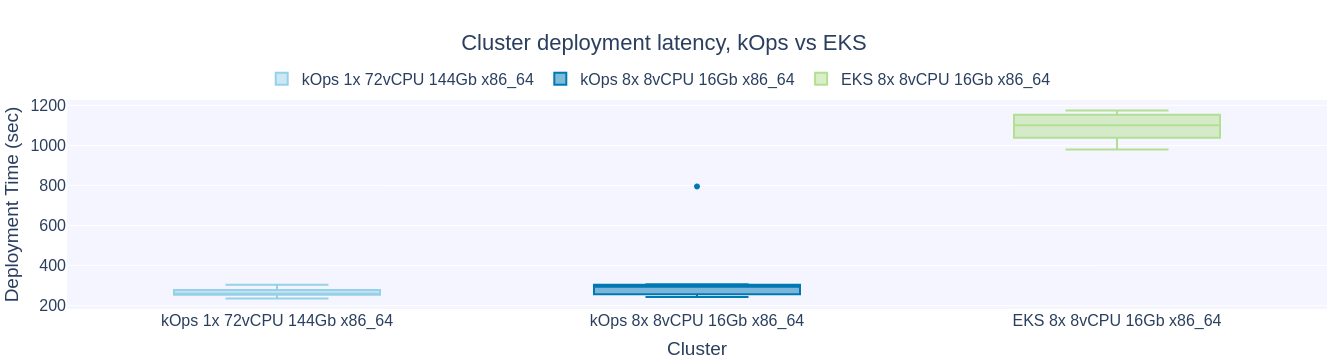

In [10]:
# import plotly.express as px
# fig = px.box(df_list[0], x="Cluster", y="deploy")
fig = create_figure('Cluster deployment latency, kOps vs EKS', 'Cluster', 'Deployment Time (sec)')

for i, df in enumerate(df_list):
    fig.add_trace(
        go.Box(
            # x=df['cluster'],
            y=df['deploy'],
            name=cluster[i],
            marker_color=colorPallet[i],
        )
    )

fig.show()
write_image(fig, 'cluster_deployment_box.png')

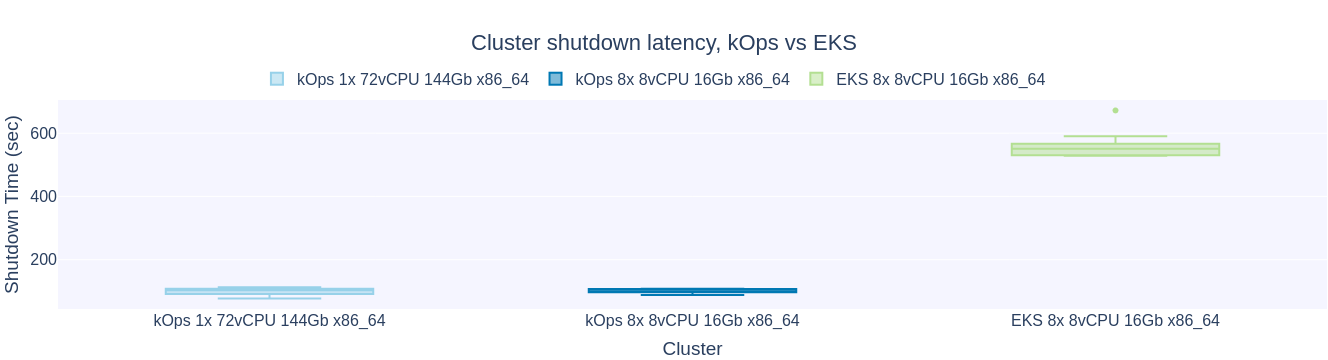

In [11]:
fig = create_figure('Cluster shutdown latency, kOps vs EKS', 'Cluster', 'Shutdown Time (sec)')

for i, df in enumerate(df_list):
    fig.add_trace(
        go.Box(
            # x=df['cluster'],
            y=df['shutdown'],
            name=cluster[i],
            marker_color=colorPallet[i],
        )
    )

fig.show()
write_image(fig, 'cluster_shutdown_box.png')